<a href="https://colab.research.google.com/github/Lounes-Kheris98/diabete.predict/blob/main/Predict_Diabets_OA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Partie1:
#Utilisation des librairies Pandas + Matplotlib 
#pour bien comprendre notre Dataset (Lecture et visualisation des données de notre Dataset)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Notre Dataset contient 768 ligne et 9 colonnes 
dataset.shape

(768, 9)

In [ ]:
#Les colonnes de notre Dataset:
#Décrire les colonnes??
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#Aucune valeur manquante dans notre Dataset
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Nombre d'élements dans notre Dataset
dataset.size

6912

In [ ]:
#Déscription statistique de notre Dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#On a 268 patients qui sont diabétique et les 500 autres non
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Text(0, 0.5, 'Glucose')

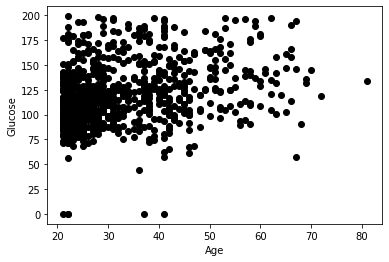

In [ ]:
plt.scatter(dataset['Age'],dataset['Glucose'],c="black")
plt.xlabel("Age")
plt.ylabel("Glucose")

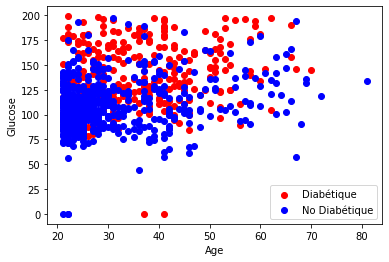

In [ ]:
plt.scatter(dataset[dataset.Outcome==1].Age,dataset[dataset.Outcome==1].Glucose,label="Diabétique",c="r")
plt.scatter(dataset[dataset.Outcome==0].Age,dataset[dataset.Outcome==0].Glucose,label="No Diabétique",c="b")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()

In [ ]:
dataset['Age'].max()

81

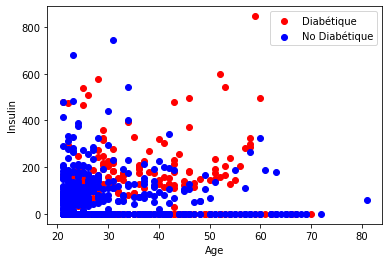

In [ ]:
plt.scatter(dataset[dataset.Outcome==1].Age,dataset[dataset.Outcome==1].Insulin,label="Diabétique",c="r")
plt.scatter(dataset[dataset.Outcome==0].Age,dataset[dataset.Outcome==0].Insulin,label="No Diabétique",c="b")
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend()

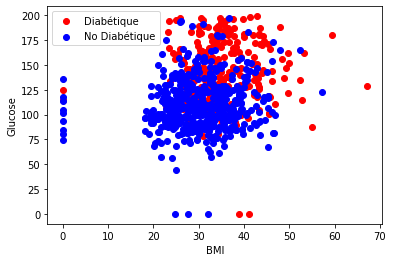

In [ ]:
plt.scatter(dataset[dataset.Outcome==1].BMI,dataset[dataset.Outcome==1].Glucose,label="Diabétique",c="r")
plt.scatter(dataset[dataset.Outcome==0].BMI,dataset[dataset.Outcome==0].Glucose,label="No Diabétique",c="b")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.legend()

Text(0, 0.5, 'BloodPressure')

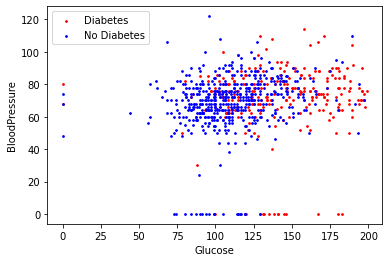

In [ ]:
plt.scatter(dataset[dataset.Outcome==1].Glucose,dataset[dataset.Outcome==1].BloodPressure,label='Diabetes',color='r',s=3)
plt.scatter(dataset[dataset.Outcome==0].Glucose,dataset[dataset.Outcome==0].BloodPressure,label='No Diabetes',color='b',s=3)
plt.legend()
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

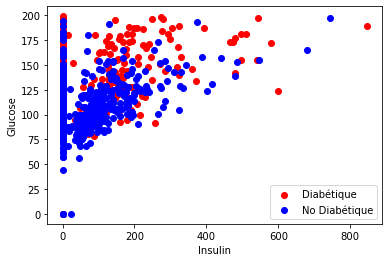

In [ ]:
plt.scatter(dataset[dataset.Outcome==1].Insulin,dataset[dataset.Outcome==1].Glucose,label="Diabétique",c="r")
plt.scatter(dataset[dataset.Outcome==0].Insulin,dataset[dataset.Outcome==0].Glucose,label="No Diabétique",c="b")
plt.xlabel("Insulin")
plt.ylabel("Glucose")
plt.legend()

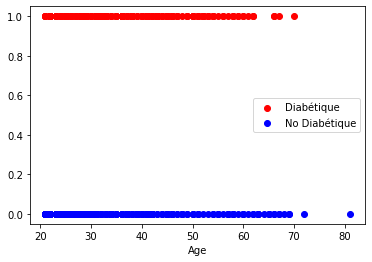

In [ ]:
plt.scatter(dataset[dataset.Outcome==1].Age,dataset[dataset.Outcome==1].Outcome,label="Diabétique",c="r")
plt.scatter(dataset[dataset.Outcome==0].Age,dataset[dataset.Outcome==0].Outcome,label="No Diabétique",c="b")
plt.xlabel("Age")
plt.ylabel("")
plt.legend()

In [ ]:
#Décomposition de notre dataset (train + test)
import sklearn
from sklearn.model_selection import train_test_split
train,test=train_test_split(dataset,test_size=0.35,random_state=0) 


In [ ]:
train.count()

Pregnancies                 499
Glucose                     499
BloodPressure               499
SkinThickness               499
Insulin                     499
BMI                         499
DiabetesPedigreeFunction    499
Age                         499
Outcome                     499
dtype: int64

In [ ]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,3.801603,121.943888,69.719439,20.881764,87.124248,32.090982,0.469078,33.460922,0.358717
std,3.333943,32.566041,19.238031,15.980286,120.465815,8.092367,0.337401,11.902380,0.480105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,27.450000,0.237000,24.000000,0.000000
50%,3.000000,119.000000,72.000000,23.000000,48.000000,32.400000,0.368000,29.000000,0.000000
75%,6.000000,143.000000,80.000000,32.000000,140.000000,36.600000,0.611000,40.500000,1.000000
max,15.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,3.925651,118.947955,67.966543,19.895911,66.211896,31.810037,0.477067,32.832714,0.330855
std,3.439516,30.806526,19.557292,15.909854,103.722630,7.493949,0.320314,11.502672,0.471398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.900000,0.252000,24.000000,0.000000
50%,3.000000,113.000000,72.000000,22.000000,0.000000,31.600000,0.376000,28.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,105.000000,36.500000,0.640000,41.000000,1.000000
max,17.000000,199.000000,114.000000,54.000000,680.000000,52.900000,1.893000,70.000000,1.000000


In [ ]:
#Application de l'algorithme knn

